In [1]:
# Import the required dependencies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Change the integer-encoding to one-hot-encoding
# So that model don't assume a natural ordering between categories
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print("Train Images Shape : " + str(train_images.shape))
print("Test Images Shape : " + str(test_images.shape))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Train Images Shape : (50000, 32, 32, 3)
Test Images Shape : (10000, 32, 32, 3)


In [4]:
# The classes in CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3) , activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3) , activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(BatchNormalization()) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [6]:
earlystop_callback = EarlyStopping(
  monitor='val_loss', min_delta=0, patience=4)

In [7]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=40, verbose=1,
                    validation_data=(test_images, test_labels), batch_size=256, shuffle=True, callbacks=[earlystop_callback])
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100 ))

Epoch 1/40
196/196 [==============================] - 39s 57ms/step - loss: 1.9187 - accuracy: 0.3027 - val_loss: 2.1525 - val_accuracy: 0.4152
Epoch 2/40
196/196 [==============================] - 10s 53ms/step - loss: 1.5304 - accuracy: 0.4415 - val_loss: 1.8637 - val_accuracy: 0.4795
Epoch 3/40
196/196 [==============================] - 10s 53ms/step - loss: 1.4012 - accuracy: 0.4947 - val_loss: 1.4998 - val_accuracy: 0.5027
Epoch 4/40
196/196 [==============================] - 10s 53ms/step - loss: 1.3211 - accuracy: 0.5289 - val_loss: 1.3358 - val_accuracy: 0.5204
Epoch 5/40
196/196 [==============================] - 10s 53ms/step - loss: 1.2489 - accuracy: 0.5519 - val_loss: 1.2180 - val_accuracy: 0.5648
Epoch 6/40
196/196 [==============================] - 10s 53ms/step - loss: 1.1877 - accuracy: 0.5799 - val_loss: 1.2467 - val_accuracy: 0.5520
Epoch 7/40
196/196 [==============================] - 10s 53ms/step - loss: 1.1312 - accuracy: 0.5984 - val_loss: 1.1573 - val_accuracy:

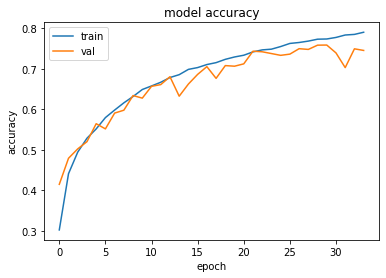

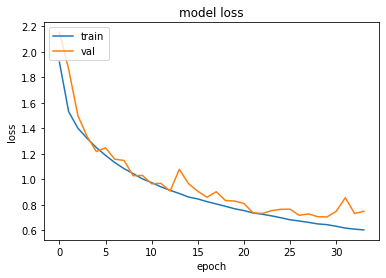

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.save('my_model.h5')

In [ ]:
"""
Run this cell, by replacing "<IMAGE_PATH_HERE>" with your image path to test a custom image
"""
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

def test(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    res = model.predict(np.array([img]))
    ans = np.argmax(res)
    print(class_names[ans])

test("<IMAGE_PATH_HERE>")